In [1]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
def convert_y(dataY):
    y = []
    threshold = 50
    for i in range (len(dataY)):
        if(dataY[i] > threshold):
            y.append(0)
        else:
            y.append(1)
    return np.array(y)

In [3]:
def convert_labels(x):
    y = []
    for i in range(len(x)):
        y.append((199.7-0.7*x[i][0])/199)
        # y.append([201-x[i][0]])
    return np.array(y)

In [4]:
dataX = pd.read_csv('./datasets/spotofy_music_normalized.csv')
dataX.head()
m = len(dataX) # Number of  examples
X = np.array(dataX)

dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
Y = np.array(dataY)
Y = convert_y(Y)
# Y.tofile('datasets/binary_labels.csv',sep=',')
print(Y)


[1 1 1 ... 0 0 0]


Accuracy is: 0.6929411764705883
Precison is: 0.56
Recall is: 0.16
Confusion Matrix is :


<AxesSubplot:>

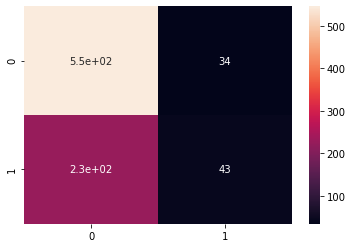

In [5]:
kf = KFold(n_splits=5)
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
i = 0
best_acc = -1e9
cm = []
for train_index, test_index in kf.split(X):
    i+=1
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = SVC(kernel = 'linear')
    # model = SVC(kernel = 'poly')

    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    confusionM = confusion_matrix(y_test, y_predicted, labels=model.classes_)
    acc = accuracy_score(y_test, y_predicted)
    if (acc > best_acc):
        best_acc = acc
        cm = confusionM
print("Accuracy is:",best_acc)
TP = cm[1][1]
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precison is:", round(precision,2))
print("Recall is:", round(recall, 2))
print("Confusion Matrix is :")
sns.heatmap(cm, annot =True)
#     y_predicted = model.predict()

In [6]:
dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
Y = np.array(dataY)
Y = convert_labels(Y)
# Y.tofile('datasets/binary_labels.csv',sep=',')
print(Y)

[1.         0.99648241 0.99296482 ... 0.48291457 0.3281407  0.31758794]


## Support Vector Regression -

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
num_folds = 5
kf = KFold(n_splits=num_folds)

i = 1
total_error = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_predicted = regressor.predict(X_test)
    score = mean_squared_error(y_test,y_predicted)
    print(f"Score on Fold {i} = ", score)
    total_error += score
    i += 1

print("\nAverage Error = ",str(total_error/num_folds))
    

Score on Fold 1 =  0.04703801723747615
Score on Fold 2 =  0.04458721067630787
Score on Fold 3 =  0.047220165095133944
Score on Fold 4 =  0.04268181152375282
Score on Fold 5 =  0.04325508788133931

Average Error =  0.04495645848280202
